In [1]:
# Download data

from pathlib import Path
from torchvision import datasets
from torchvision.transforms import ToTensor

data_path = Path('data/')
mnist_data_path = data_path / "MNIST"

download_mnist = True

if mnist_data_path.is_dir():
    print('MNIST data already exists. Skipping download...')
    download_mnist = False
else:
    print('MNIST data folder not found. Downloading MNIST....')
    download_mnist = True



train_data = datasets.MNIST(
    root="data",
    train=True,
    download=download_mnist,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=download_mnist,
    transform=ToTensor()
)

MNIST data already exists. Skipping download...


In [2]:
img, label = train_data[0]

In [3]:
label

5

In [4]:
img

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [5]:
img.shape

torch.Size([1, 28, 28])

In [6]:
# Sample info
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [7]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [8]:
from torch.utils.data import Dataset
isinstance(train_data, Dataset)

True

In [9]:
class_names = train_data.classes

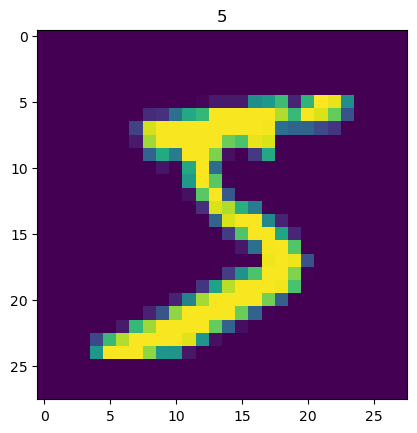

In [10]:
# Visualizing the data
import matplotlib.pyplot as plt
img, label = train_data[0]

plt.imshow(img.squeeze())
plt.title(label);

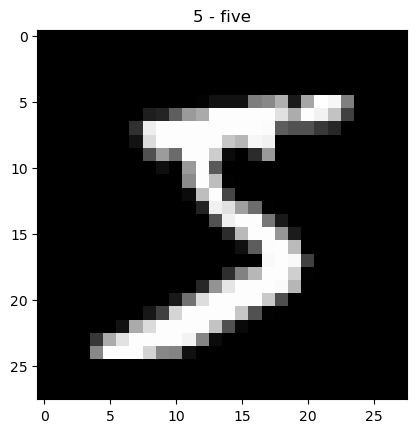

In [11]:
# Grayscale version
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label]);

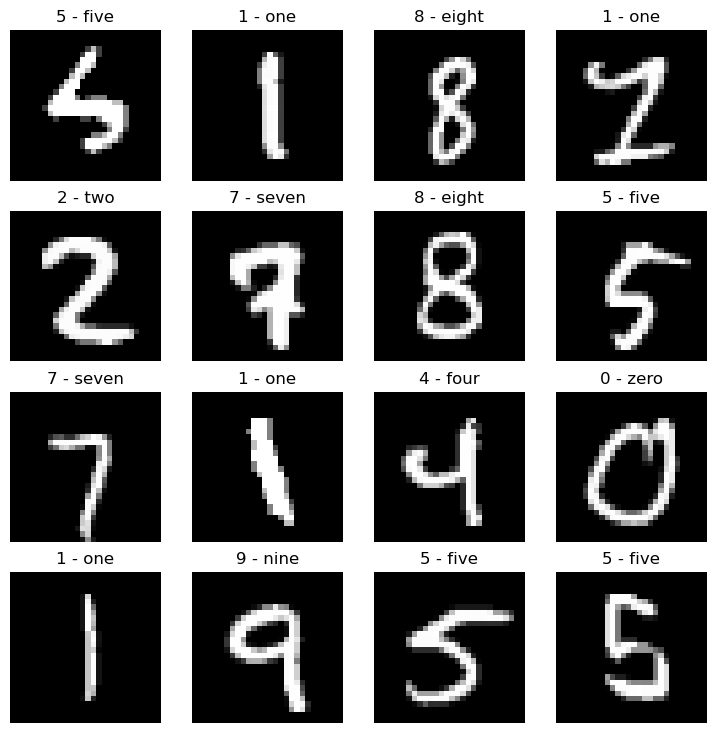

In [12]:
# Plot more images
import torch
torch.manual_seed(13)

fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False);

In [13]:
# DataLoader
from torch.utils.data import DataLoader

# Setup the batch size (Hyperparameter)
BATCH_SIZE = 32

# Turn datasets into batches (iterable)
train_dataloader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

print(f'Train data loader {train_dataloader}')
print(f'Test data loader {test_dataloader}')

Train data loader <torch.utils.data.dataloader.DataLoader object at 0x177509ad0>
Test data loader <torch.utils.data.dataloader.DataLoader object at 0x177803210>


In [14]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [15]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label 8, label size: torch.Size([])


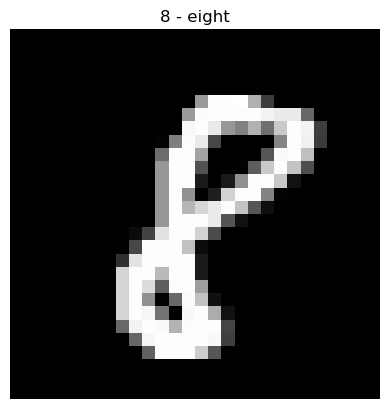

In [16]:
# Visualize one sample
torch.manual_seed(13)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off")

print(f"Image size: {img.shape}")
print(f"Label {label}, label size: {label.shape}")

In [17]:
# Experimentation for baseline
from torch import nn

# Create a flatten layer
flatten_model = nn.Flatten()

# Single image
x = train_features_batch[0]

# Flatten the image
output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [18]:
flatten_model(torch.randn((3, 4, 2))).shape

torch.Size([3, 8])

In [19]:
# V0 for MNIST model
from torch import nn

class MNISTModelV0(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [20]:
# Instantiate V0
torch.manual_seed(13)

model_0 = MNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
)
model_0.to('cpu')

MNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
# Setup loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [22]:
# Timing our experiments
from timeit import default_timer as timer

def print_train_time(start, end, device=None):
    total_time = end - start
    print(f'Train time on {device}: {total_time:.3f} seconds')
    return total_time

In [23]:
# !pip install tqdm

In [24]:
from tqdm.auto import tqdm
from helper_functions import accuracy_fn

torch.manual_seed(13)
train_time_start_on_cpu = timer()

epochs = 3

# Training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n {'-' * 100}")
    train_loss = 0

    for batch, (X, y) in enumerate(train_dataloader):
        # Training
        model_0.train()

        # 1.Forward pass
        y_pred = model_0(X)

        # 2.Calculate loss (per batch)
        loss = loss_fn(y_pred, y)

        # 3.Optimizer zero grad
        optimizer.zero_grad()

        # 4.Loss backward
        loss.backward()

        # 5.Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader)


    # Testing
    test_loss, test_acc = 0, 0
    model_0.eval()

    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1.Forward pass
            test_pred = model_0(X)

            # 2.Calculate loss (accumulate)
            test_loss += loss_fn(test_pred, y)

            # 3.Calculate accuracy
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)


    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(
    start=train_time_start_on_cpu,
    end=train_time_end_on_cpu,
    device=str(next(model_0.parameters()).device)
)

/Users/shreyashkumar/anaconda3/envs/pytorch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
 ----------------------------------------------------------------------------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 33%|███▎      | 1/3 [00:01<00:03,  1.63s/it]


Train loss: 0.00000 | Test loss: 0.31293, Test acc: 91.17%

Epoch: 1
 ----------------------------------------------------------------------------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 67%|██████▋   | 2/3 [00:03<00:01,  1.59s/it]


Train loss: 0.00000 | Test loss: 0.30413, Test acc: 91.18%

Epoch: 2
 ----------------------------------------------------------------------------------------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 3/3 [00:04<00:00,  1.59s/it]


Train loss: 0.00000 | Test loss: 0.28565, Test acc: 91.79%

Train time on cpu: 4.785 seconds


In [25]:
next(model_0.parameters()).device

device(type='cpu')

In [28]:
torch.manual_seed(13)

def eval_model(
    model,
    data_loader,
    loss_fn,
    accuracy_fn
):
    loss, acc = 0, 0
    model.eval()

    for X, y in data_loader:
        # Make predictions
        y_pred = model(X)

        # Accumulate the loss and accuracy per batch
        loss += loss_fn(y_pred, y)
        acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))


    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

    return {
        "model_name": model.__class__.__name__,
        "model_loss": loss.item(),
        "model_acc": acc
    }

In [29]:
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'MNISTModelV0',
 'model_loss': 0.28564971685409546,
 'model_acc': 91.79313099041534}

In [30]:
# Device agnostic code
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [31]:
# V1 MNIST - Mix of linear and non-linear layers

class MNISTModelV1(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)

In [34]:
torch.manual_seed(13)

model_1 = MNISTModelV1(
    input_shape=28*28, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available

next(model_1.parameters()).device # check model device

device(type='cpu')

In [35]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_1.parameters(), 
    lr=0.1
)

In [36]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [37]:
torch.manual_seed(13)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(
    start=train_time_start_on_gpu,
    end=train_time_end_on_gpu,
    device=device
)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------


 33%|███▎      | 1/3 [00:01<00:03,  1.67s/it]

Train loss: 0.85432 | Train accuracy: 69.84%
Test loss: 0.72263 | Test accuracy: 73.01%

Epoch: 1
---------


 67%|██████▋   | 2/3 [00:03<00:01,  1.65s/it]

Train loss: 0.64098 | Train accuracy: 76.98%
Test loss: 0.51245 | Test accuracy: 81.74%

Epoch: 2
---------


100%|██████████| 3/3 [00:04<00:00,  1.64s/it]

Train loss: 0.50949 | Train accuracy: 82.08%
Test loss: 0.49650 | Test accuracy: 82.26%

Train time on cpu: 4.911 seconds


In [39]:
# Move values to device
torch.manual_seed(13)

def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'MNISTModelV1',
 'model_loss': 0.4964990019798279,
 'model_acc': 82.25838658146965}